In [1]:
using Pkg
Pkg.activate("C:\\Users\\Alex\\Desktop\\repo\\2612\\0903\\dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\repo\2612\0903\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [33]:
@inbounds U(y, p) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
@inbounds σ(x, p) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
@inbounds g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )

@inbounds function TM(u, p, t)
    
    U_ = U(u[3], p)
    
    du1 = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du2 = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2], p)
    
    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [34]:
t = 500; tt = 1000; tstep = 0.001
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [224]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;

U0 =0.35
I0 = -1.899;

In [225]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]

u0 = [6.154581240346446, 0.7336262321641008, 0.4403107515803029]

3-element Vector{Float64}:
 6.154581240346446
 0.7336262321641008
 0.4403107515803029

In [226]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.35, 0.305, 0.3, -1.899]
 time:          0.0
 state:         [6.154581240346446, 0.7336262321641008, 0.4403107515803029]


In [227]:
lb_size = 35; tck_size = 20;

In [228]:
tr, trange = trajectory(ds, t, Δt = tstep; Ttr = tt)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 1000.0:0.001:1500.0)

In [229]:
ts, tf = 1, 30000

(1, 30000)

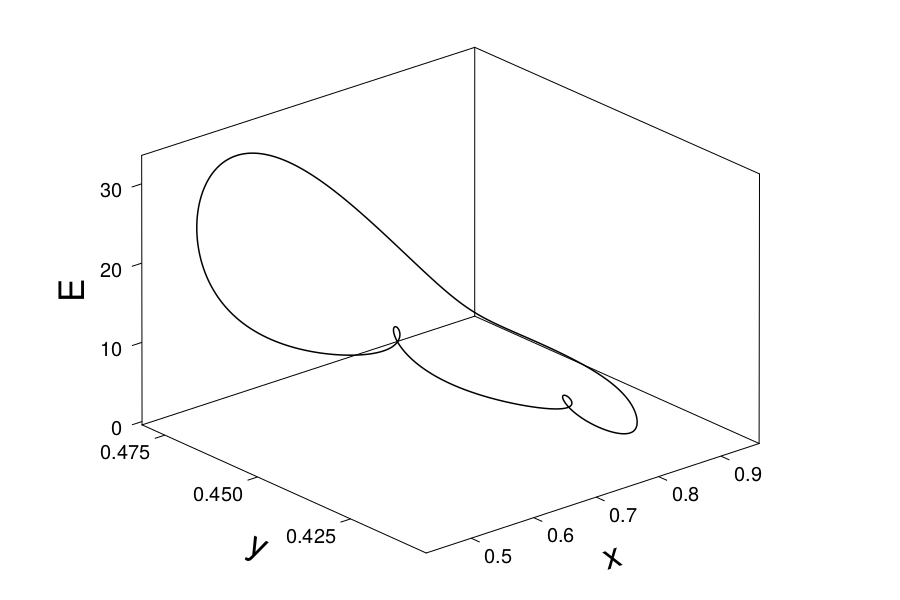

In [230]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 1.5, color = :black)

f

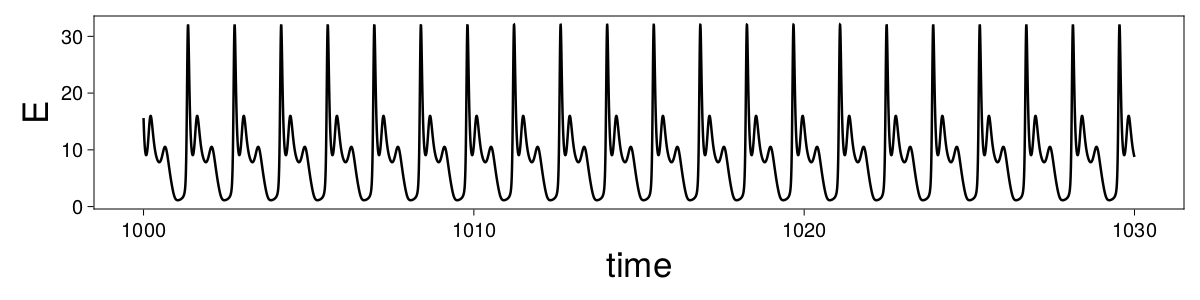

In [231]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f